In [1]:
# All the imports you will need, go install them with pip install or conda.
from PIL import Image, ImageOps
import IPython.display as pydisplay
import numpy as np

# Use below code to play with parameters to get desired output

<img src=https://static.wikia.nocookie.net/02f3bab1-2d55-4baf-8c52-47fa95d694b1/scale-to-width/370>

# Parameter Description
- gif_path = Path of your gif image
- output = rename to whatever file name you want or keep as is
- write = Dont touch, it allows you to create a file in write mode
- threshold = Play around to for better black and white image
- oled_width = Dont touch, default screen size
- oled_height = Dont touch, default screen size
- scale = Play around to enlarge or make your image smaller
- offset = Change coordinates to position your gif file in a 128 x 64 px frame
- duration = duration of each frame in ms. 

In [2]:
# Parameters
# To make life easier, just add the image to same folder this .ipynb file is at.
gif_path = 'Sample/pikawalk.gif'
output = 'output.hex'
write = 'w'
threshold = 210
oled_width = 128
oled_height = 64
scale = .15
offset = ((15,-5))
duration = 30

Create a Black and White (BW) Gif and save it to preview your modifications

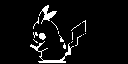

In [3]:
'''
Open your gif file, interates through each frame, resize by scale, convert to grayscale, 
convert to either black or white depending on threshold, create a new 128 x 64 image and paste 
your rescaled image and move or offset the gif picture to preferred location.
'''
with Image.open(gif_path) as im:
    frames = []
    for i in range(im.n_frames):
        im.seek(i)
        resized_im = im.resize((int(im.width * scale),int(im.height * scale)),resample=Image.Resampling.BILINEAR)
        bw_im = resized_im.convert('L').point(lambda x: 0 if x < threshold else 255)
        newImage = Image.new(mode='L',size=(oled_width,oled_height), color='white') # Change to black or white to better fit image
        newImage.paste(bw_im, offset)
        newImage = ImageOps.invert(newImage) # Comment Invert out depending on background
        frames.append(newImage)
    # For some reason, frame 0 always gets inverted, therefore it is removed
    frames[1].save('output.gif', save_all=True, append_images=frames[2:], duration=duration, loop=0)
    # Displays the animated GIF below
    pydisplay.display(pydisplay.Image('output.gif'))

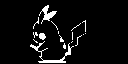

In [4]:
# Preview of a frame, specifically frame 1 since we start our numbering or indexing at 0
# Example of 5 frames will be --> 0, 1, 2, 3, 4 which totals 5
frames[1]

We are now going to interate through each frame, grab its pixel data, convert to byte information, and then create a hex file for each frame to paste code for QMK.

This is the meat and potatoes of the code. This took the longest to figure out. This code takes each pixel within your image/frame and combines 8 bits or pixels together to make a byte in order for your LED screen to read.

In [5]:
# Put each frame converted to bytes and transformed into a list
byte_frames = []
for frame in frames:
    # Flip Image
    frame_t = frame.transpose(4)
    # Create empty byte list
    bytes = bytearray()
    # Count how many bits you go through
    byte_counter = 0
    # Iterate through pixels in each frame
    for y in range(oled_width):
        # Placeholder to hold 8 bits, then converted to byte
        rowstring = ''
        for x in range(oled_height):
            # Get pixel information from coordinate
            framepixel = frame_t.getpixel((x,y))
            # Convert either 0 or 255 colors to 1 or 0 bit information
            if byte_counter <= 6:
                if framepixel == 255:
                    rowstring += '1'
                elif framepixel == 0:
                    rowstring += '0'
                byte_counter += 1
            else:
                if framepixel == 255:
                    rowstring += '1'
                elif framepixel == 0:
                    rowstring += '0'
                byte_counter = 0
                # Add accumulated 8 bits into byte array
                bytes.append(int(rowstring,2))
                rowstring =''
    # Get bytes and convert to numpy array to transform in matrix and convert to hex format
    bytes_modified = np.array([f'0x{byte:02x}' for byte in bytes][:-8])
    # Transform and reshape array
    bytes_modified = np.flip(np.rot90(bytes_modified.reshape(127,8).transpose(), k=2), axis=1)
    # Save newly transformed frame into bytes and add to final list
    byte_frames.append(bytes_modified)

Create a hex file to copy and paste and "flash your drive"

In [6]:
# All this code does is formats the way to see the code conveniently
frame_counter = 1
with open(output, write) as file:
    for frame in byte_frames:
        row_counter = 0
        file.write('{//' + f'Frame Number: {frame_counter}\n')
        for row in frame:
            row_counter += 1
            for col in row:
                file.write(col + ', ')
            if row_counter != 8:
                file.write(col + ',\n')
            else:
                file.write(col + '\n')
                row_counter = 0
        frame_counter += 1
        if frame_counter == len(byte_frames) + 1:
            file.write('}\n')
        else:
            file.write('},\n')

In [7]:
print(f'Total Number of Frames Created: {len(byte_frames)}')

Total Number of Frames Created: 40


# YOU DID IT
High five yourself bud

<img src='https://media0.giphy.com/media/gVoBC0SuaHStq/200w.gif?cid=6c09b952kryrvy15bnz1vracln285bvdfoqfmugr2ic97yce&rid=200w.gif&ct=g'>

# Odin75 LED Screen Customization
Now you can customize your OLED Screen :)  
<img src=https://i.shgcdn.com/36ace757-dfe8-46be-8fe1-fe266be93c77/-/format/auto/-/preview/3000x3000/-/quality/best/ height=300>

[Odin75 Website](https://kbdfans.com/products/kbdfans-odin-75-mechanical-keyboard)

# Credits
Drop a thank you if this made your life easier. It took a bit to automate and get to work.  
**Discord**: Gloriouz #7360

df